In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# !pip install tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
!pip install wordcloud

In [2]:
df = pd.read_csv('/kaggle/input/tweets-dataset/train.csv')

In [3]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
df.drop(['selected_text'], axis = 1, inplace = True)

In [5]:
df.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


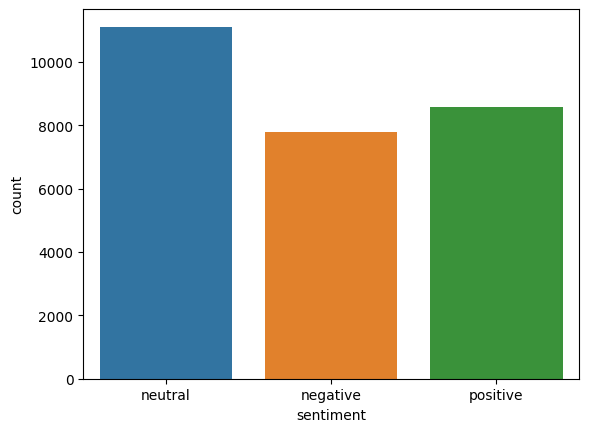

In [6]:
sns.countplot(x = 'sentiment', data = df)
plt.show()

In [7]:
df.shape

(27481, 3)

In [8]:
df['text'].iloc[0]

' I`d have responded, if I were going'

In [9]:
len(df['text'].iloc[0])

36

In [10]:
df['text'].head()

0                  I`d have responded, if I were going
1        Sooo SAD I will miss you here in San Diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     Sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [12]:
df['text'].iloc[0]

' I`d have responded, if I were going'

In [13]:
text_length_list = []
for i in range(len(df)):
    if isinstance(df['text'].iloc[i], float) == True:
        print(df['text'].iloc[i])

nan


In [14]:
isinstance("suhas", float)

False

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27481 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27481 non-null  object
dtypes: object(3)
memory usage: 644.2+ KB


In [16]:
df.dropna(inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     27480 non-null  object
 1   text       27480 non-null  object
 2   sentiment  27480 non-null  object
dtypes: object(3)
memory usage: 858.8+ KB


In [18]:
df['text_length'] = df['text'].apply(lambda x: len(x))

In [19]:
df.head()

,textID,text,sentiment,text_length
0,cb774db0d1,"I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46
2,088c60f138,my boss is bullying me...,negative,25
3,9642c003ef,what interview! leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75


In [20]:
df['text_words'] = df['text'].apply(lambda x: len(x.split()))

In [21]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [22]:
## Taking separate dataframes for different values such as positive, negative and neutral reviews respectively. 

positive_df = df[df['sentiment'] == 'positive']
negative_df = df[df['sentiment'] == 'negative']
neutral_df = df[df['sentiment'] == 'neutral']

In [23]:
print("The shape of the dataframe that contains only the positive reviews is: {}".format(positive_df.shape))
print("The shape of the dataframe that contains only the negative reviews is: {}".format(negative_df.shape))
print("The shape of the dataframe that contains only the neutral reviews is:  {}".format(neutral_df.shape))

The shape of the dataframe that contains only the positive reviews is: (8582, 5)
The shape of the dataframe that contains only the negative reviews is: (7781, 5)
The shape of the dataframe that contains only the neutral reviews is:  (11117, 5)


In [24]:
wordcloud = WordCloud(width = 500, height = 500)

In [25]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [26]:
positive_df.head()

,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [27]:
positive_text = []
for i in range(len(positive_df)):
    positive_text.append(positive_df['text'].iloc[i])

In [28]:
positive_text[:5]

['2am feedings for the baby are fun when he is all smiles and coos',
 ' Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
 'I really really like the song Love Story by Taylor Swift',
 'Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet',
 'the free fillin` app on my ipod is fun, im addicted']

In [29]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

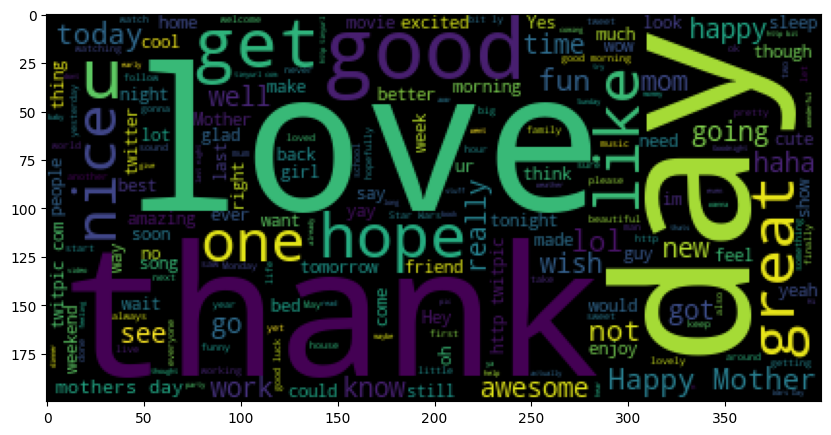

In [30]:
wordcloud = WordCloud(stopwords = stopwords)
wordcloud.generate(''.join(positive_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

In [31]:
negative_text = []
for i in range(len(negative_df)):
    negative_text.append(negative_df['text'].iloc[i])

In [32]:
negative_text[0: 5]

[' Sooo SAD I will miss you here in San Diego!!!',
 'my boss is bullying me...',
 ' what interview! leave me alone',
 ' Sons of ****, why couldn`t they put them on the releases we already bought',
 'My Sharpie is running DANGERously low on ink']

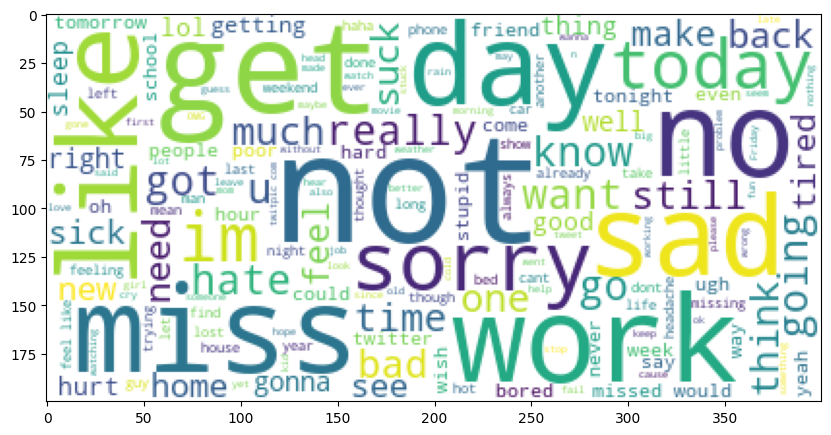

In [33]:
wordcloud = WordCloud(stopwords = stopwords, background_color = 'white')
wordcloud.generate(''.join(negative_text))
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.show()

In [34]:
df.head()

,textID,text,sentiment,text_length,text_words
0,cb774db0d1,"I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [35]:
negative_df.head()

,textID,text,sentiment,text_length,text_words
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,088c60f138,my boss is bullying me...,negative,25,5
3,9642c003ef,what interview! leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,75,14
12,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative,44,8


In [36]:
positive_df.head()

,textID,text,sentiment,text_length,text_words
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,64,14
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,69,10
11,16fab9f95b,I really really like the song Love Story by Ta...,positive,56,11
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,positive,135,24
25,e00c6ef376,"the free fillin` app on my ipod is fun, im add...",positive,51,11


In [37]:
df.drop(['textID'], axis = 1, inplace = True)

In [38]:
df.head()

,text,sentiment,text_length,text_words
0,"I`d have responded, if I were going",neutral,36,7
1,Sooo SAD I will miss you here in San Diego!!!,negative,46,10
2,my boss is bullying me...,negative,25,5
3,what interview! leave me alone,negative,31,5
4,"Sons of ****, why couldn`t they put them on t...",negative,75,14


In [39]:
X = df.drop(['sentiment'], axis = 1)
y = df['sentiment']

In [40]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [41]:
X_train.shape

(19236, 3)

In [42]:
X_cv.shape

(8244, 3)

In [43]:

# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [44]:
!pip install tqdm

In [45]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentence in tqdm(X_train['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 19236/19236 [00:00<00:00, 26771.45it/s]


In [46]:
preprocessed_text[0: 5]

['24 hours since dog put sleep rip old friend',
 'not feeling comfortable today',
 'hurray twin girls born beautiful may day',
 'bah h8 waking',
 'textmate crashed first time 3 months not bad actually textmate']

In [47]:
for i in range(len(X_train)):
    X_train['text'].iloc[i] = preprocessed_text[i]

In [48]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [49]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentence in tqdm(X_cv['text'].values):
    sent = decontracted(sentence)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_text.append(sent.lower().strip())

100%|██████████| 8244/8244 [00:00<00:00, 26392.00it/s]


In [50]:
preprocessed_text[0: 5]

['mom happy present yayy',
 'no surprise probably know',
 'nope difference 5 omr c class anyone notice flight number wy flight lhr wy 911',
 'smells badly garlic',
 'friday whole different meaning work saturday sunday']

In [51]:
for i in range(len(X_cv)):
    X_cv['text'].iloc[i] = preprocessed_text[i]

In [52]:
X_cv.head()

,text,text_length,text_words
7214,mom happy present yayy,38,8
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6600,smells badly garlic,25,5
7807,friday whole different meaning work saturday s...,78,14


In [53]:
binarizer = LabelBinarizer()
y_train_converted = binarizer.fit_transform(y_train)
binarizer = LabelBinarizer()
y_cv_converted = binarizer.fit_transform(y_cv)

In [54]:
y_cv_converted

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [55]:
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train['text'])
X_cv_text = vectorizer.transform(X_cv['text'])

In [56]:
X_train_text.shape

(19236, 20619)

In [57]:
X_train_text[0: 5]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31 stored elements and shape (5, 20619)>

In [58]:
to_categorical(np.arange(1, 10))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [59]:
y_train

19832    negative
10340    negative
11044    positive
14088    negative
20333     neutral
           ...   
15650    positive
22638    positive
10124    positive
5601     positive
14001    negative
Name: sentiment, Length: 19236, dtype: object

In [60]:
encoder = LabelEncoder()
y_train_converted = encoder.fit_transform(y_train)


In [61]:
y_train_converted

array([0, 0, 2, ..., 2, 2, 0])

In [62]:
y_train_final = to_categorical(y_train_converted)

In [63]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [64]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [65]:
X_train_dropped.head()

,text_length,text_words
19832,78,18
10340,41,6
11044,48,9
14088,19,5
20333,80,14


In [66]:
X_train['text'].head()

19832          24 hours since dog put sleep rip old friend
10340                        not feeling comfortable today
11044             hurray twin girls born beautiful may day
14088                                        bah h8 waking
20333    textmate crashed first time 3 months not bad a...
Name: text, dtype: object

In [67]:
X_train_dropped = X_train.drop(['text'], axis = 1)

In [68]:
X_train_dropped.head()

,text_length,text_words
19832,78,18
10340,41,6
11044,48,9
14088,19,5
20333,80,14


In [69]:
X_cv.head()

,text,text_length,text_words
7214,mom happy present yayy,38,8
19840,no surprise probably know,67,11
19409,nope difference 5 omr c class anyone notice fl...,102,19
6600,smells badly garlic,25,5
7807,friday whole different meaning work saturday s...,78,14


In [70]:
X_cv_dropped = X_cv.drop(['text'], axis = 1)

In [71]:
X_cv_dropped.head()

,text_length,text_words
7214,38,8
19840,67,11
19409,102,19
6600,25,5
7807,78,14


In [72]:
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_dropped)
X_cv_final = scaler.transform(X_cv_dropped)

In [73]:
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [74]:
X_cv_final[0: 5]

array([[0.25362319, 0.22580645],
       [0.46376812, 0.32258065],
       [0.7173913 , 0.58064516],
       [0.15942029, 0.12903226],
       [0.54347826, 0.41935484]])

In [75]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

encoder = LabelEncoder()
y_cv_encoded = encoder.fit_transform(y_cv)

In [76]:
y_train_final = to_categorical(y_train_encoded)
y_cv_final = to_categorical(y_cv_encoded)

In [77]:
y_train_final[0: 5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [78]:
y_cv_final[0: 5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [79]:
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [80]:
X_train.head()

,text,text_length,text_words
19832,24 hours since dog put sleep rip old friend,78,18
10340,not feeling comfortable today,41,6
11044,hurray twin girls born beautiful may day,48,9
14088,bah h8 waking,19,5
20333,textmate crashed first time 3 months not bad a...,80,14


In [81]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
X_cv_vectorized = vectorizer.transform(X_cv['text'])

In [82]:
X_train_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 135844 stored elements and shape (19236, 20619)>

In [83]:
X_train_final[0: 5]

array([[0.54347826, 0.5483871 ],
       [0.27536232, 0.16129032],
       [0.32608696, 0.25806452],
       [0.11594203, 0.12903226],
       [0.55797101, 0.41935484]])

In [84]:
X_train_bow_toarray = X_train_vectorized.toarray()
X_cv_bow_toarray = X_cv_vectorized.toarray()

In [85]:
X_train_new = np.concatenate((X_train_bow_toarray, X_train_final), axis = 1)
X_cv_new = np.concatenate((X_cv_bow_toarray, X_cv_final), axis = 1)

In [86]:


model = Sequential([
    Dense(100,  activation='relu'),
    Dropout(0.3),
    Dense(25, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # Assuming this is a multi-class classification
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [88]:
history = model.fit(X_train_new, y_train_final, epochs = 10, validation_data = (X_cv_new, y_cv_final))

Epoch 1/10


I0000 00:00:1733138576.501353     114 service.cc:145] XLA service 0x78143c006c30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733138576.501429     114 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 58/602 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3465 - loss: 1.0962

I0000 00:00:1733138581.224946     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


602/602 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.4645 - loss: 1.0247 - val_accuracy: 0.6559 - val_loss: 0.8395
Epoch 2/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6983 - loss: 0.7575 - val_accuracy: 0.6725 - val_loss: 0.7579
Epoch 3/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7969 - loss: 0.5543 - val_accuracy: 0.6813 - val_loss: 0.7840
Epoch 4/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8557 - loss: 0.4098 - val_accuracy: 0.6699 - val_loss: 0.8577
Epoch 5/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8933 - loss: 0.3194 - val_accuracy: 0.6803 - val_loss: 1.0147
Epoch 6/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9201 - loss: 0.2486 - val_accuracy: 0.6731 - val_loss: 1.0857
Epoch 7/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9384 - loss: 0.2067 - val_accuracy: 0.6720 - val_loss: 1.3328
Epoch 8/10
602/602 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9490 - loss: 0.1675 - val_accuracy: 0.6667 - va

In [89]:
# Print the final training and validation accuracy
print(f"Final training accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")

Final training accuracy: 95.97%
Final validation accuracy: 65.94%


In [90]:
# Evaluate on the training set
train_loss, train_accuracy = model.evaluate(X_train_new, y_train_final)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on the validation set
val_loss, val_accuracy = model.evaluate(X_cv_new, y_cv_final)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


602/602 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0441
Training Accuracy: 98.62%
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6620 - loss: 1.5430
Validation Accuracy: 65.94%


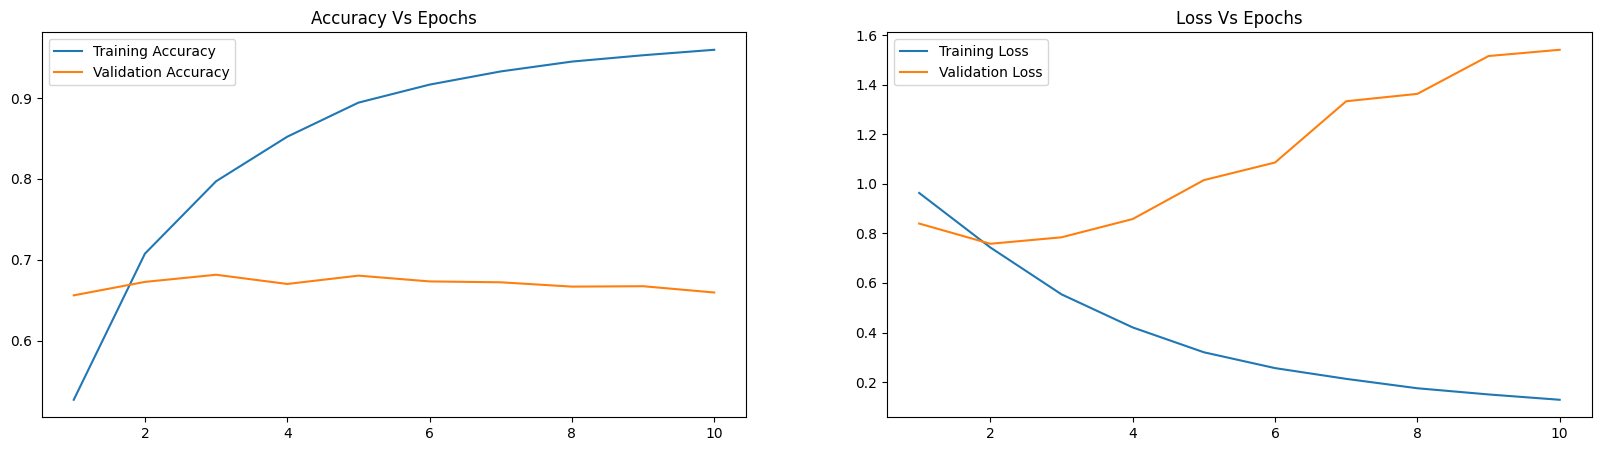

In [91]:
# Access metrics from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = np.arange(1, 11)

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

sns.lineplot(x=epochs, y=accuracy, ax=ax[0], label='Training Accuracy')
sns.lineplot(x=epochs, y=val_accuracy, ax=ax[0], label='Validation Accuracy')
ax[0].set_title('Accuracy Vs Epochs')

sns.lineplot(x=epochs, y=loss, ax=ax[1], label='Training Loss')
sns.lineplot(x=epochs, y=val_loss, ax=ax[1], label='Validation Loss')
ax[1].set_title('Loss Vs Epochs')

plt.show()

In [92]:
# Check the shape of training and validation data
print(f"Shape of training data: {X_train_text.shape}")
print(f"Shape of validation data: {X_cv_text.shape}")

# Refit the vectorizer if necessary to align the feature sizes
# If X_train_text.shape[1] != X_cv_text.shape[1], refit the vectorizer as shown below:
# vectorizer = TfidfVectorizer()
# X_train_text = vectorizer.fit_transform(X_train['text'])
# X_cv_text = vectorizer.transform(X_cv['text'])

Shape of training data: (19236, 20619)
Shape of validation data: (8244, 20619)


In [93]:
# Print the model summary to check the input shape
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │     2,062,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         2,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,195,056 (23.63 MB)

 Trainable params: 2,065,018 (7.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,130,038 (15.75 MB)

In [94]:
X_cv_text.shape

(8244, 20619)

In [95]:
import numpy as np

def predict_sentiment(user_input, model, vectorizer):
    """Predict the sentiment of user input.

    Args:
        user_input (str): The input text for sentiment analysis.
        model (Sequential): The trained Keras model for prediction.
        vectorizer (TfidfVectorizer or CountVectorizer): The vectorizer used during training for text transformation.

    Returns:
        str: Predicted sentiment label (e.g., 'positive', 'negative', 'neutral').
    """
    # Transform user input
    user_input_vectorized = vectorizer.transform([user_input]).toarray()

    # Define additional features (e.g., placeholder values)
    # Adjust this to match the actual features used during training
    additional_features = np.array([[0, 0]])  # Replace with relevant feature values or calculations

    # Concatenate with any additional features used during training
    user_input_new = np.concatenate((user_input_vectorized, additional_features), axis=1)

    # Check final input shape before feeding to the model
    print(f"Shape of user_input_new: {user_input_new.shape}")

    # Make prediction
    prediction = model.predict(user_input_new)
    
    # Get the index of the highest probability
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Map the predicted class index to a sentiment label (adjust labels as per your data)
    label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
    
    return label_map[predicted_class]

# Example usage:
user_input = "Nice watch"
sentiment = predict_sentiment(user_input, model, vectorizer)
print(f"Predicted Sentiment: {sentiment}")


Shape of user_input_new: (1, 20621)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Predicted Sentiment: positive


In [96]:
print(f"Shape of X_train_bow_toarray: {X_train_bow_toarray.shape}")
print(f"Shape of X_train_final: {X_train_final.shape}")
print(f"Shape of X_train_new: {X_train_new.shape}")


Shape of X_train_bow_toarray: (19236, 20619)
Shape of X_train_final: (19236, 2)
Shape of X_train_new: (19236, 20621)


In [97]:
# # Code to save the model
# from keras.models import load_model

# # Save the model to an HDF5 file
# model.save('sentiment_model.h5')
# print("Model saved as 'sentiment_model.h5'")

# # To load the model later
# # loaded_model = load_model('sentiment_model.h5')

In [98]:
# import pickle

# # Save the vectorizer to a file
# with open('vectorizer.pkl', 'wb') as file:
#     pickle.dump(vectorizer, file)
# print("Vectorizer saved as 'vectorizer.pkl'")
